# IPL Prediction

In [1]:
# Importing Necessary Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns
import pickle
%matplotlib inline

# Analysing Data

In [2]:
#reading the dataset from csv file
matches = pd.read_csv('data.csv')

In [3]:
matches.head()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0.0,0.0,222
1,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0.0,0.0,222
2,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0.0,0.0,222
3,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0.0,0.0,222
4,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0.0,0.0,222


In [4]:
matches.columns

Index(['mid', 'date', 'venue', 'batting_team', 'bowling_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')

In [5]:
matches.shape

(76614, 15)

# Data Cleaning

In [6]:
#removing the unnecessary columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
matches.drop(labels=columns_to_remove, axis=1, inplace=True)

In [7]:
matches.batting_team.unique() 

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Lucknow Super Giants', 'Gujarat Titans'],
      dtype=object)

In [8]:
matches.replace(to_replace ="Delhi Daredevils", 
                 value = "Delhi Capitals", 
                  inplace = True)
matches.batting_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Lucknow Super Giants', 'Gujarat Titans'],
      dtype=object)

In [9]:
current_teams = ['Chennai Super Kings', 'Delhi Capitals' , 'Kings XI Punjab', 
                 'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
                 'Royal Challengers Bangalore', 'Sunrisers Hyderabad','Gujarat Titans', 'Lucknow Super Giants']

In [10]:
matches = matches[(matches['batting_team'].isin(current_teams)) & (matches['bowling_team'].isin(current_teams))]

In [11]:
print(matches.batting_team.unique())    #categorial feature 1
print(matches.bowling_team.unique())   #categorial feature 2

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Capitals' 'Sunrisers Hyderabad' 'Lucknow Super Giants'
 'Gujarat Titans']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Capitals'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad' 'Gujarat Titans'
 'Lucknow Super Giants']


In [12]:
#setting minimum over before prediction
matches = matches[matches['overs']>=6.0]

In [13]:
matches.head()

,date,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
38,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222
42,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,67,1,6.5,46,1,222


In [14]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37809 entries, 38 to 76613
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            37809 non-null  object 
 1   batting_team    37809 non-null  object 
 2   bowling_team    37809 non-null  object 
 3   runs            37809 non-null  int64  
 4   wickets         37809 non-null  int64  
 5   overs           37809 non-null  float64
 6   runs_last_5     37809 non-null  int64  
 7   wickets_last_5  37809 non-null  int64  
 8   total           37809 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 2.9+ MB


In [15]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
matches['date'] = matches['date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [1]:
matches.date.dtype

NameError: name 'matches' is not defined

# Data Preprocessing

In [ ]:
# using OneHotEncoding to add categorial features that are main teams playing against each other , Bat_Team and Bowl_Team
match_df = pd.get_dummies(data=matches, columns=['batting_team', 'bowling_team'])

In [18]:
match_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Gujarat Titans,...,bowling_team_Chennai Super Kings,bowling_team_Delhi Capitals,bowling_team_Gujarat Titans,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Lucknow Super Giants,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
38,2008-04-18,62,1,6.1,55,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39,2008-04-18,63,1,6.2,52,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
40,2008-04-18,64,1,6.3,47,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41,2008-04-18,66,1,6.4,45,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42,2008-04-18,67,1,6.5,46,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
match_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'batting_team_Chennai Super Kings',
       'batting_team_Delhi Capitals', 'batting_team_Gujarat Titans',
       'batting_team_Kings XI Punjab', 'batting_team_Kolkata Knight Riders',
       'batting_team_Lucknow Super Giants', 'batting_team_Mumbai Indians',
       'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings',
       'bowling_team_Delhi Capitals', 'bowling_team_Gujarat Titans',
       'bowling_team_Kings XI Punjab', 'bowling_team_Kolkata Knight Riders',
       'bowling_team_Lucknow Super Giants', 'bowling_team_Mumbai Indians',
       'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad'],
      dtype='object')

In [20]:
# Data Splitting:

X_train = match_df.drop(labels='total',axis=1)[match_df['date'].dt.year <= 2016]
X_test = match_df.drop(labels='total',axis=1)[match_df['date'].dt.year >= 2017]

In [21]:
y_train = match_df[match_df['date'].dt.year <= 2016]['total'].values
y_test = match_df[match_df['date'].dt.year >= 2017]['total'].values

In [22]:
X_train.drop(labels='date',axis=True, inplace=True)
X_test.drop(labels='date',axis=True, inplace=True)

<H1> Model Development

<H2>Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [24]:
reg.score(X_train,y_train)

0.6757883503217181

In [25]:
reg.score(X_test,y_test)

0.7566345920193004

In [26]:
reg.predict([[35,3,5,18,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0]])

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([152.81495176])

<H2> Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [28]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,35,50,80,100,150,200]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X_train,y_train)

C:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.60915e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.59576e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.58713e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.60584e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.59791e-18): result

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 35, 50, 80, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [29]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 200}
-300.14107200063137


In [30]:
ridge_regressor.predict([[35,3,5,18,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]])

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([148.7152452])

In [31]:
ridge_regressor.score(X_train,y_train)

-283.74945871384915

In [32]:
ridge_regressor.score(X_test,y_test)

-224.6130656931391

In [33]:
prediction=ridge_regressor.predict(X_test)

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

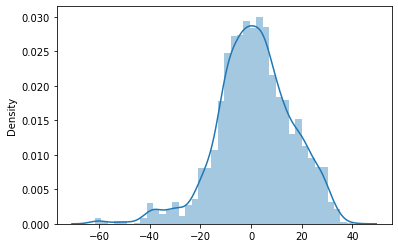

In [34]:
sns.distplot(y_test-prediction)

In [35]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 11.546063564965468
MSE: 224.6130656931391
RMSE: 14.987096639881225


In [36]:
X1 = match_df.drop(labels='total',axis=1)
X_train1 = match_df.drop(labels='total',axis=1)[match_df['date'].dt.year <= 2022]

y1 = match_df[match_df['date'].dt.year <= 2022]['total'].values
y_train1 = match_df[match_df['date'].dt.year <= 2022]['total'].values

# Removing the 'date' column
X1.drop(labels='date',axis=True, inplace=True)
X_train1.drop(labels='date',axis=True, inplace=True)

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X1, y1)

RandomForestRegressor(n_estimators=10, random_state=0)

In [38]:
regressor.score(X_test,y_test)

0.9928297567289289

In [39]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(50,60,70,80,90,100), activation="logistic", alpha=0.0056, max_iter=1000, warm_start=True, max_fun=1007)
mlp.fit(X_train1,y_train1)

MLPRegressor(activation='logistic', alpha=0.0056,
             hidden_layer_sizes=(50, 60, 70, 80, 90, 100), max_fun=1007,
             max_iter=1000, warm_start=True)

In [40]:
mlp.score(X_test,y_test)

-0.03874282029644016